In [18]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../..')
from modules.many_features import utils, constants, env
from modules.many_features.dt_agent import DTAgent
from sklearn.model_selection import train_test_split

In [19]:
SEED = 42
np.random.seed(SEED)

#### The data

In [20]:
#df = pd.read_csv('../../data/anemia_synth_dataset_some_nans_unspecified_more_feats.csv')
#df= pd.read_csv('../../data/more_features/more_feats_new_labels_0.1.csv')
df = pd.read_csv('../../data/more_features/more_feats_new_labels_0.1_noisy_0.4.csv')
#df = df.fillna(-1)
df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,age,gender,indirect_bilirubin,transferrin,creatinine,cholestrol,copper,ethanol,folate,glucose,label
0,12.190830,163.097819,3.084127,5.923027,232.339305,79.550470,-1.000000,3.748689,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,Anemia of chronic disease
1,9.944819,187.086684,5.096256,-1.000000,-1.000000,100.121185,-1.000000,5.857746,72.837294,0,1.146823,-1.000000,-1.000000,-1.000000,-1.000000,20.943783,-1.000000,-1.000000,Unspecified anemia
2,13.703345,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,80.372015,5.684361,45.702318,0,1.789854,206.817706,1.551467,90.217875,76.009442,22.651663,12.551513,-1.000000,No anemia
3,7.346123,27.669632,-1.000000,-1.000000,428.089083,77.375356,95.912445,6.469686,52.594562,0,0.222080,297.319109,1.265341,126.999491,46.998397,77.183582,8.518821,119.113878,Anemia of chronic disease
4,12.295548,225.097199,3.827717,0.000000,-1.000000,102.137453,-1.000000,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,Unspecified anemia


In [21]:
utils.get_dt_performance(df)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional in

(0.9495714285714286,
 0.9375796043606589,
 0.9649074036208941,
 datetime.timedelta(microseconds=7725))

In [22]:
class_dict = constants.CLASS_DICT
df['label'] = df['label'].replace(class_dict)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
X_train, y_train = np.array(X_train_df), np.array(y_train_df)
X_test, y_test = np.array(X_test_df), np.array(y_test_df)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional in

((56000, 18), (14000, 18), (56000,), (14000,))

In [23]:
y_test[:5]

array([6, 2, 2, 5, 5], dtype=int64)

#### The DT agent

In [24]:
%%time
dt_agent = DTAgent(X_test, y_test)
test_df = dt_agent.test()
test_df.head()

Testing done.....
Wall time: 4min


,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",6.0,6.0
1,4.0,1.0,0.0,-1.0,0.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",2.0,6.0
2,4.0,2.0,1.0,1.0,0.0,"[hemoglobin, mcv, segmented_neutrophils, Unspe...",2.0,2.0
3,4.0,3.0,0.0,-1.0,0.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",5.0,6.0
4,4.0,4.0,1.0,1.0,0.0,"[hemoglobin, mcv, ret_count, Hemolytic anemia]",5.0,5.0


In [25]:
# %%time
# dt_agent.test_sample(2)

In [26]:
# from datetime import datetime
# start = datetime.now()
# dt_agent.test_sample(2)
# end = datetime.now()
# duration = end-start
# duration

In [27]:
X_test_df.head()

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,age,gender,indirect_bilirubin,transferrin,creatinine,cholestrol,copper,ethanol,folate,glucose
12328,10.349960,-1.000000,0.998554,-1.0,-1.000000,86.411147,111.707488,4.944340,27.502990,0,0.279290,157.791243,0.728968,19.372712,51.439289,43.598944,7.558525,64.723397
4793,6.859704,305.139323,1.169502,0.0,106.333555,95.125054,-1.000000,5.097877,57.787603,1,2.908458,-1.000000,-1.000000,-1.000000,-1.000000,57.254153,-1.000000,-1.000000
13226,10.726840,-1.000000,-1.000000,0.0,-1.000000,101.259302,-1.000000,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
16629,9.126403,353.363040,1.514899,-1.0,299.684880,91.025495,203.806921,3.691072,44.381796,0,1.518567,444.995942,-1.000000,85.974431,95.398276,58.902609,27.090162,-1.000000
1786,9.721776,-1.000000,3.116853,-1.0,-1.000000,91.022674,-1.000000,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [28]:
len(test_df), len(X_test)

(14000, 14000)

In [31]:
test_df.to_csv('../../test_dfs/many_features/0.1/dt_test_df_4.csv', index=False)

In [12]:
# test_df = pd.read_csv('../../test_dfs/many_features/dt_test_df_0.1.csv')
# test_df.head()

In [29]:
success_rate, success_df = utils.success_rate(test_df)
success_rate

73.21428571428571

In [14]:
avg_length, avg_return = utils.get_avg_length_reward(test_df)
avg_length, avg_return

(4.009142857142857, 0.23985714285714285)

In [15]:
acc, f1, roc_auc = utils.test(test_df['y_actual'], test_df['y_pred'])
acc, f1, roc_auc

(0.6199285714285714, 0.6194593491419753, 0.7915418893200509)

../..\modules\many_features\utils.py:336: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:337: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.

../..\modules\many_features\utils.py:339: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:340: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.



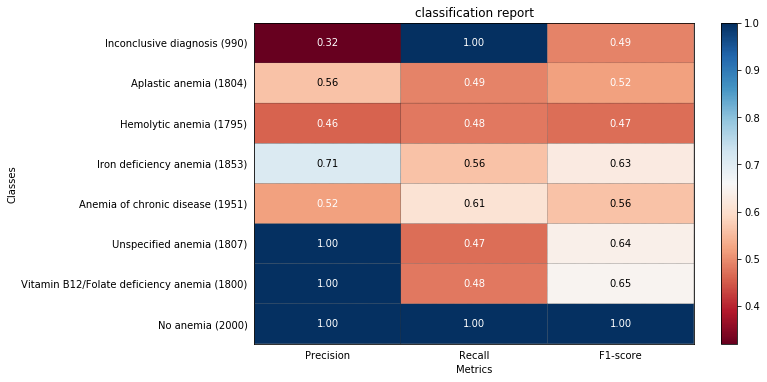

In [16]:
utils.plot_classification_report(test_df['y_actual'], test_df['y_pred'])

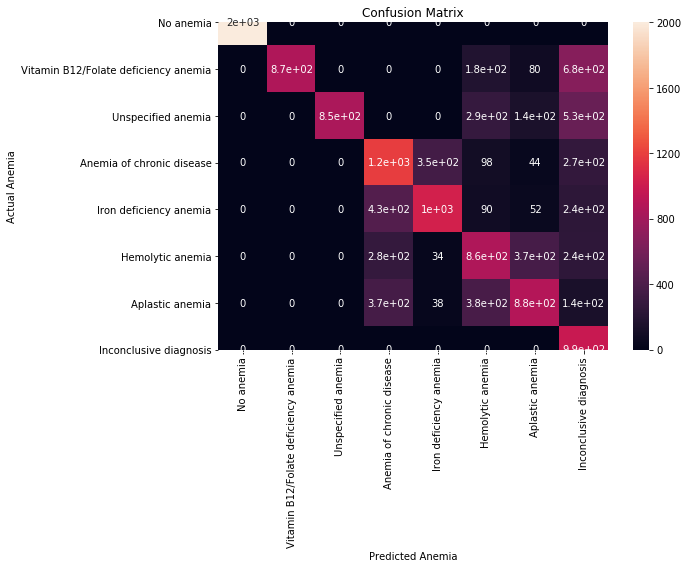

In [17]:
utils.plot_confusion_matrix(test_df['y_actual'], test_df['y_pred'])